# Plot training curves of different experiments

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from meld_graph.paths import EXPERIMENT_PATH
import os
from meld_graph.experiment import Experiment, discover_trained_experiments

In [4]:
# get list of trained experiments
# this function looks for trained experiments starting from EXPERIMENT_PATH
# you can also specify a subfolder to start from
experiment_paths = discover_trained_experiments()
exps = [Experiment.from_folder(p) for p in experiment_paths]
print(experiment_paths)

['/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-02-16_spiralconv/fold_00', '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-02-16_gmmconv/fold_00']


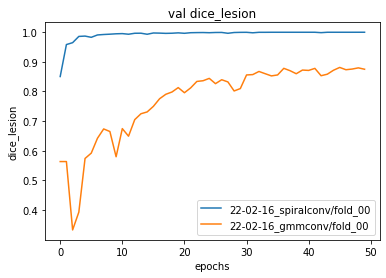

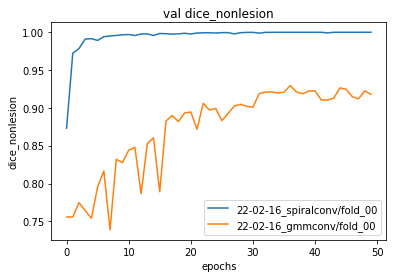

In [8]:
#import seaborn as sns
def plot_scores(exps, score='loss', split='val'):
    scores = []
    fig, ax = plt.subplots(1,1)
    for exp in exps:
        scores = exp.get_scores(split=split)[score]
        ax.plot(scores.index, scores, label=os.path.join(exp.experiment_name, f'fold_{exp.fold:02d}'))
    ax.set_xlabel('epochs')
    ax.set_ylabel(score)
    ax.set_title(f'{split} {score}')
    plt.legend()
    

plot_scores(exps, 'dice_lesion')
plot_scores(exps, 'dice_nonlesion')